This dataset contains data about Forest fires from two Algerian regions:

1. Sidi-Bel Abbes Region
2. Bejaia Region

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

The aim of this notebook is to implement a Regression algorithm, I am going to consider the 'FWI' feature as the dependent variable, and all the other variables are going to be my independent variables

In [46]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Cleaning

In [47]:
# Get the first few rows of this dataset
df = pd.read_csv("Algerian forest fires update.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [48]:
# Get some basic information about our dataset columns (Column name, # null values, data type of our cilumns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [49]:
# Find the number of null values
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [50]:
# There are a total of 2 rows where we have null values
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [51]:
# Our dataset has data from two regions, the first 122 regions contains data from the Bejaia region and the remaining dataset contains data from the Sidi-Bel Abbes Region.
# We are going to seperate these datasets and merge them to have a cohesive dataset in the end.
# I will create a new column called as 'region' to deal with this

df.loc[:122,'Region'] = 'Bejaia'
df.loc[122:,'Region'] = 'Sidi-Bel Abbes'

df[df.isnull().any(axis = 1)] # We will drop the row at location 122
df.drop([122,123,167],inplace = True)

In [52]:
# Reset the index since we have dropped a row
df.reset_index(inplace=True,drop = True)

In [53]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [54]:
# Looking at a few rows of the data at random
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
151,30,06,2012,34,42,15,1.7,79.7,12,8.5,2.2,11.5,2.2,not fire,Sidi-Bel Abbes
195,14,08,2012,37,40,13,0,91.9,22.3,55.5,10.8,22.3,15.7,fire,Sidi-Bel Abbes
89,29,08,2012,35,48,18,0,90.1,54.2,220.4,12.5,67.4,30.2,fire,Bejaia
183,02,08,2012,40,34,14,0,93.3,10.8,21.4,13.8,10.6,13.5,fire,Sidi-Bel Abbes


In [55]:
df.columns = df.columns.str.strip()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    object
dtypes: object(15)
memory usage: 28.6+ KB


In [57]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

Observations:

* I can see that all of the columns have the datatype as 'object'. However, to save space, I will go ahead and convert the data type of these columns to a more appropriate data type. (Eg int for day, moth and year)
* I have removed spaces from the colum names.
* The 'classes' column has too many categories. Maybe this has something to do with the white spaces.

In [58]:
# Fix the categories in the 'Classes' column
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [59]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [60]:
object_cols = [i for i in df.columns if df[i].dtypes == 'O']
for i in object_cols:
    if i!= 'Classes' and i!= 'Region':
        df[i] = df[i].astype(float)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.6+ KB


In [62]:
# Save this cleaned dataset to a new file
df.to_csv("forest_fire.csv",index = False)

### Exploratory Data Analysis

In [63]:
df = pd.read_csv('forest_fire.csv')
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
78,18,8,2012,36,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,fire,Bejaia
234,22,9,2012,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,fire,Sidi-Bel Abbes
171,21,7,2012,36,29,18,0.0,93.9,39.6,80.6,18.5,39.5,30.0,fire,Sidi-Bel Abbes
149,28,6,2012,37,37,13,0.0,92.5,27.2,52.4,11.7,27.1,18.4,fire,Sidi-Bel Abbes
172,22,7,2012,32,48,18,0.0,91.5,44.2,90.1,13.2,44.0,25.4,fire,Sidi-Bel Abbes


In [64]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


Observations:

* This dataset contains data fom June 2012 to September 2012
* The Fire Weather Index (FWI) ranges from 0 to 31.1
* There seem to be some outliers in this dataset as well. We will have a look at those later

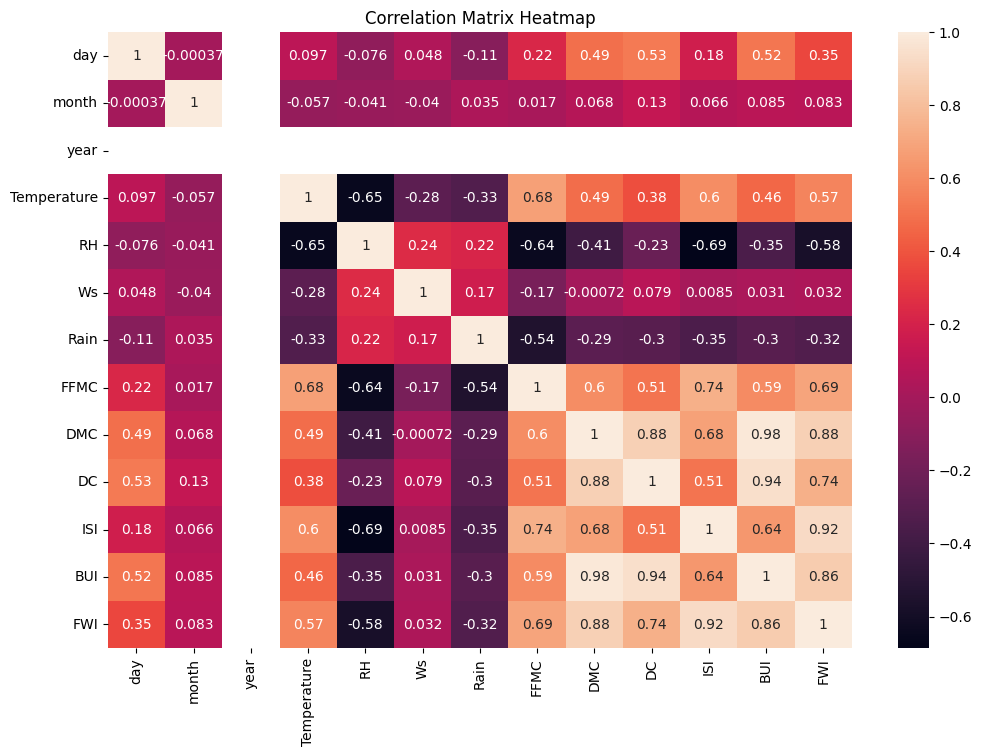

In [65]:
# Have a look at the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot = True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Observations:

* FWI has a strong positive correlation with BUI, ISI, DC, DMC and FFMC. It is somewhat related with Temperature as well.
* FWI has a strong negative correlation with RH.
* I can see the phenomenon of multi-collinearity as well. BUI is highly correlated with DC, DMC and FWI. I will drop this feature going forward.


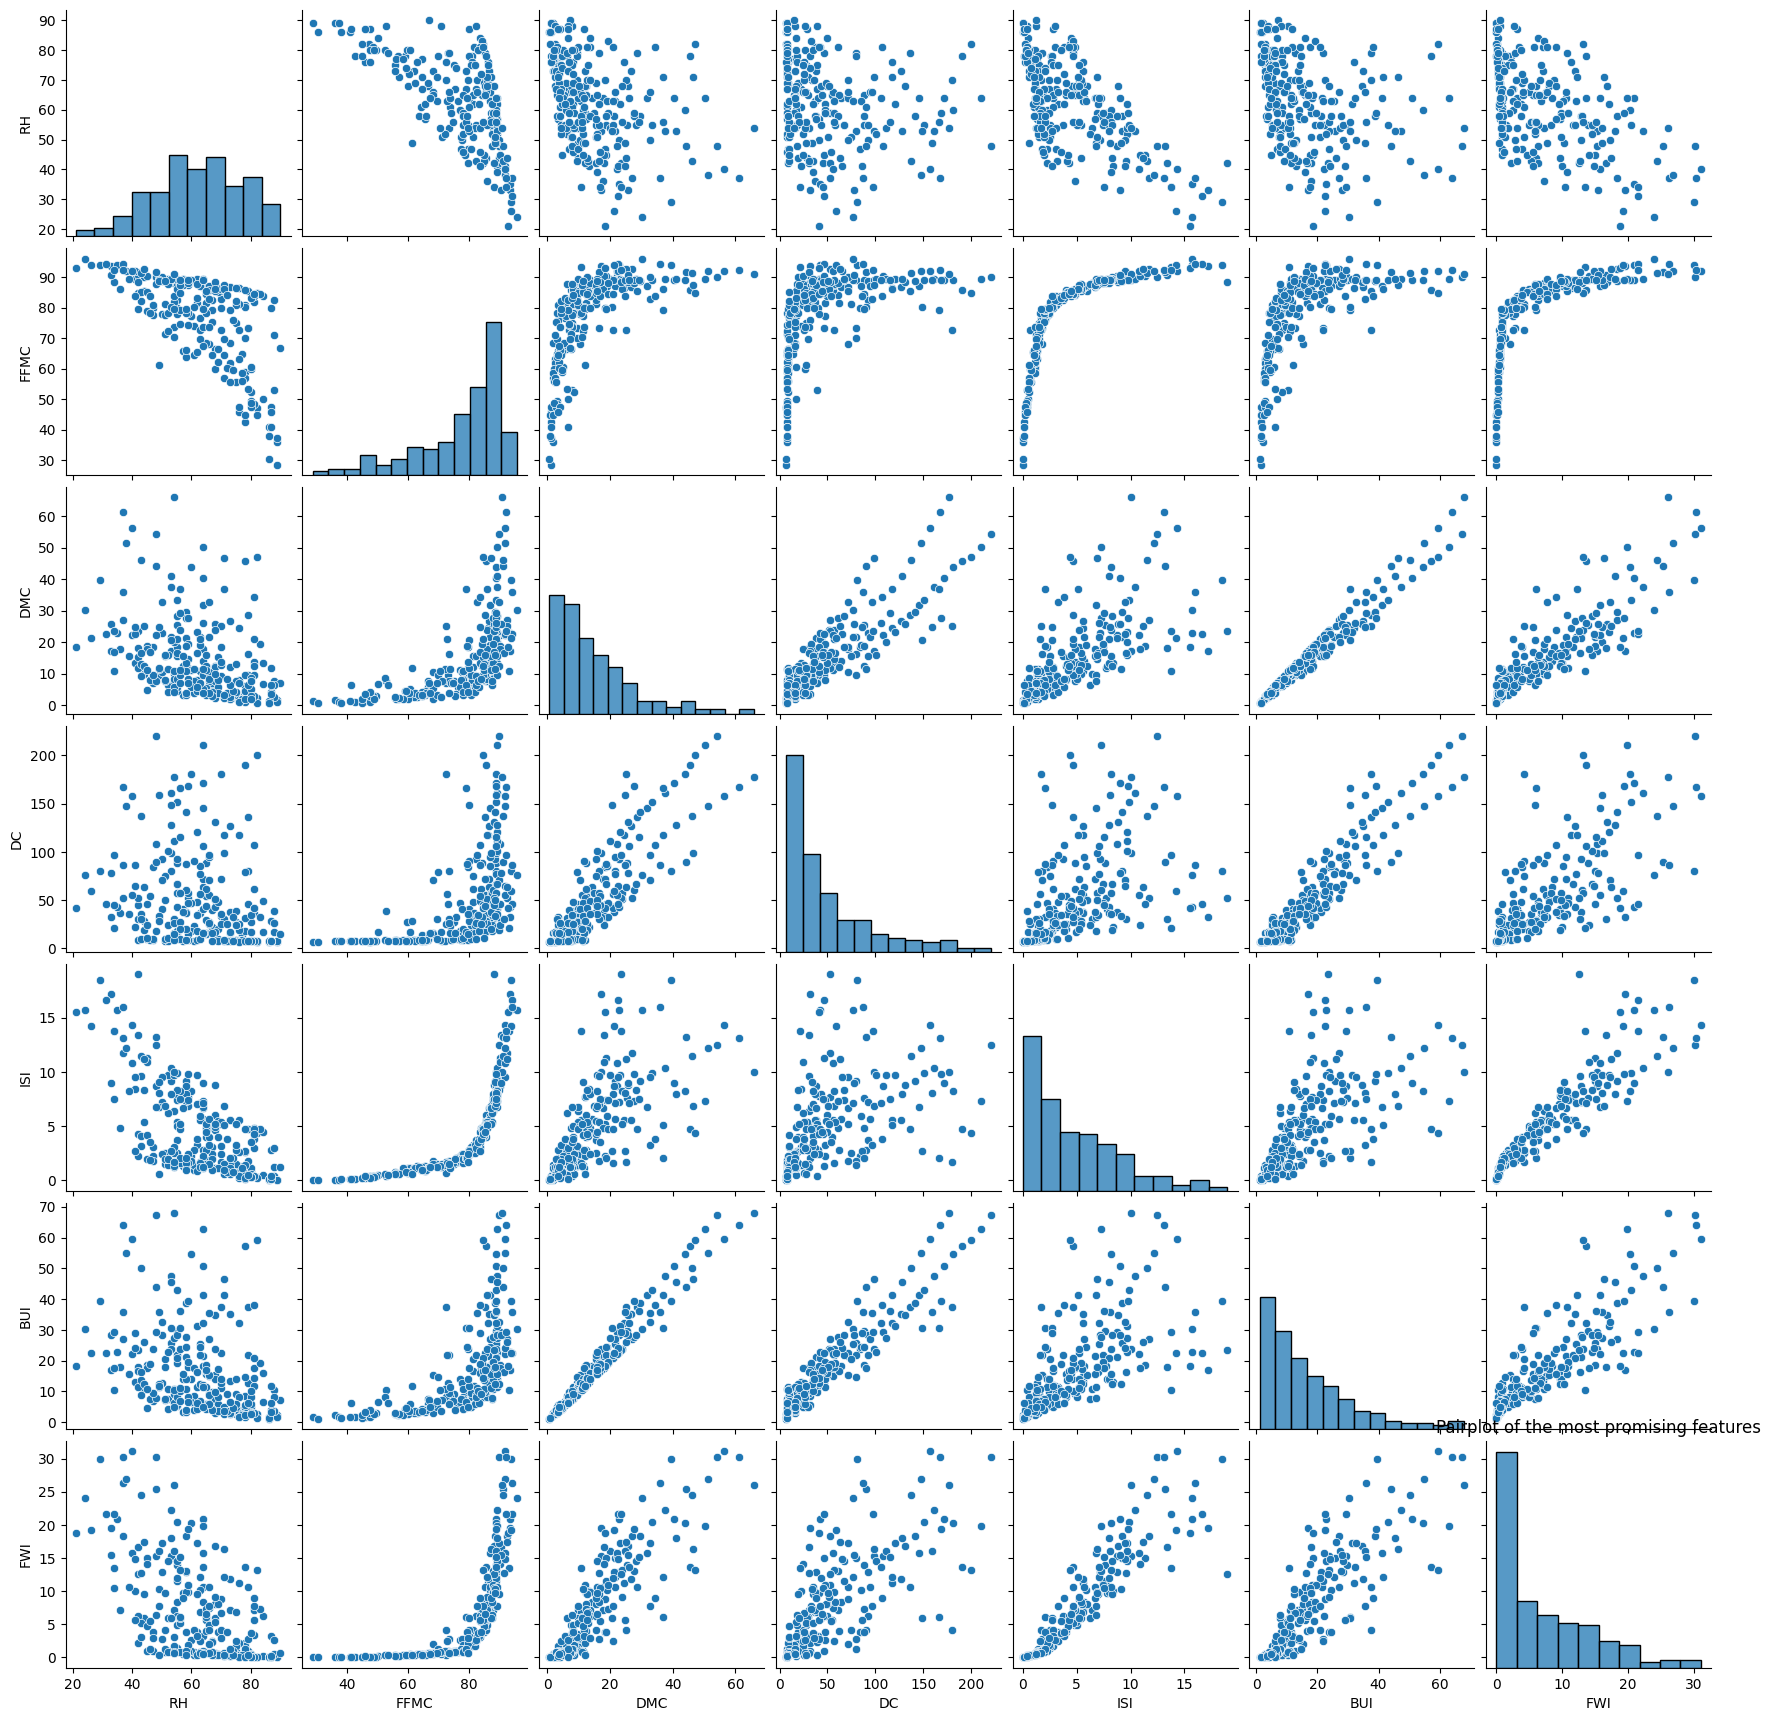

In [66]:
# Plot a pairplot of our most promising features.

promising_features = ['RH','FFMC','DMC','DC','ISI','BUI','FWI']
sns.pairplot(df[promising_features])
plt.title('Pairplot of the most promising features')
plt.show()

Observations:

* RH is negatively correlated with FWI> As RH (relative humidity) decreases, the fire weather index increases.
* FFMC is highly positively correlated with FWI after 80. (FWI increases steeply after FFMC is above 80)
* DMC and ISI are very highly correlated with FWI. These are very important features. BUI is highly correlated as well (But this feature posses the problem of multi-collinearity)

<Axes: xlabel='Classes'>

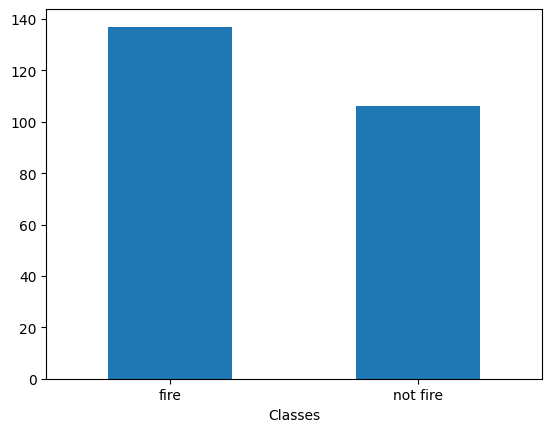

In [67]:
df['Classes'].value_counts().plot(kind = 'bar',rot = 0)

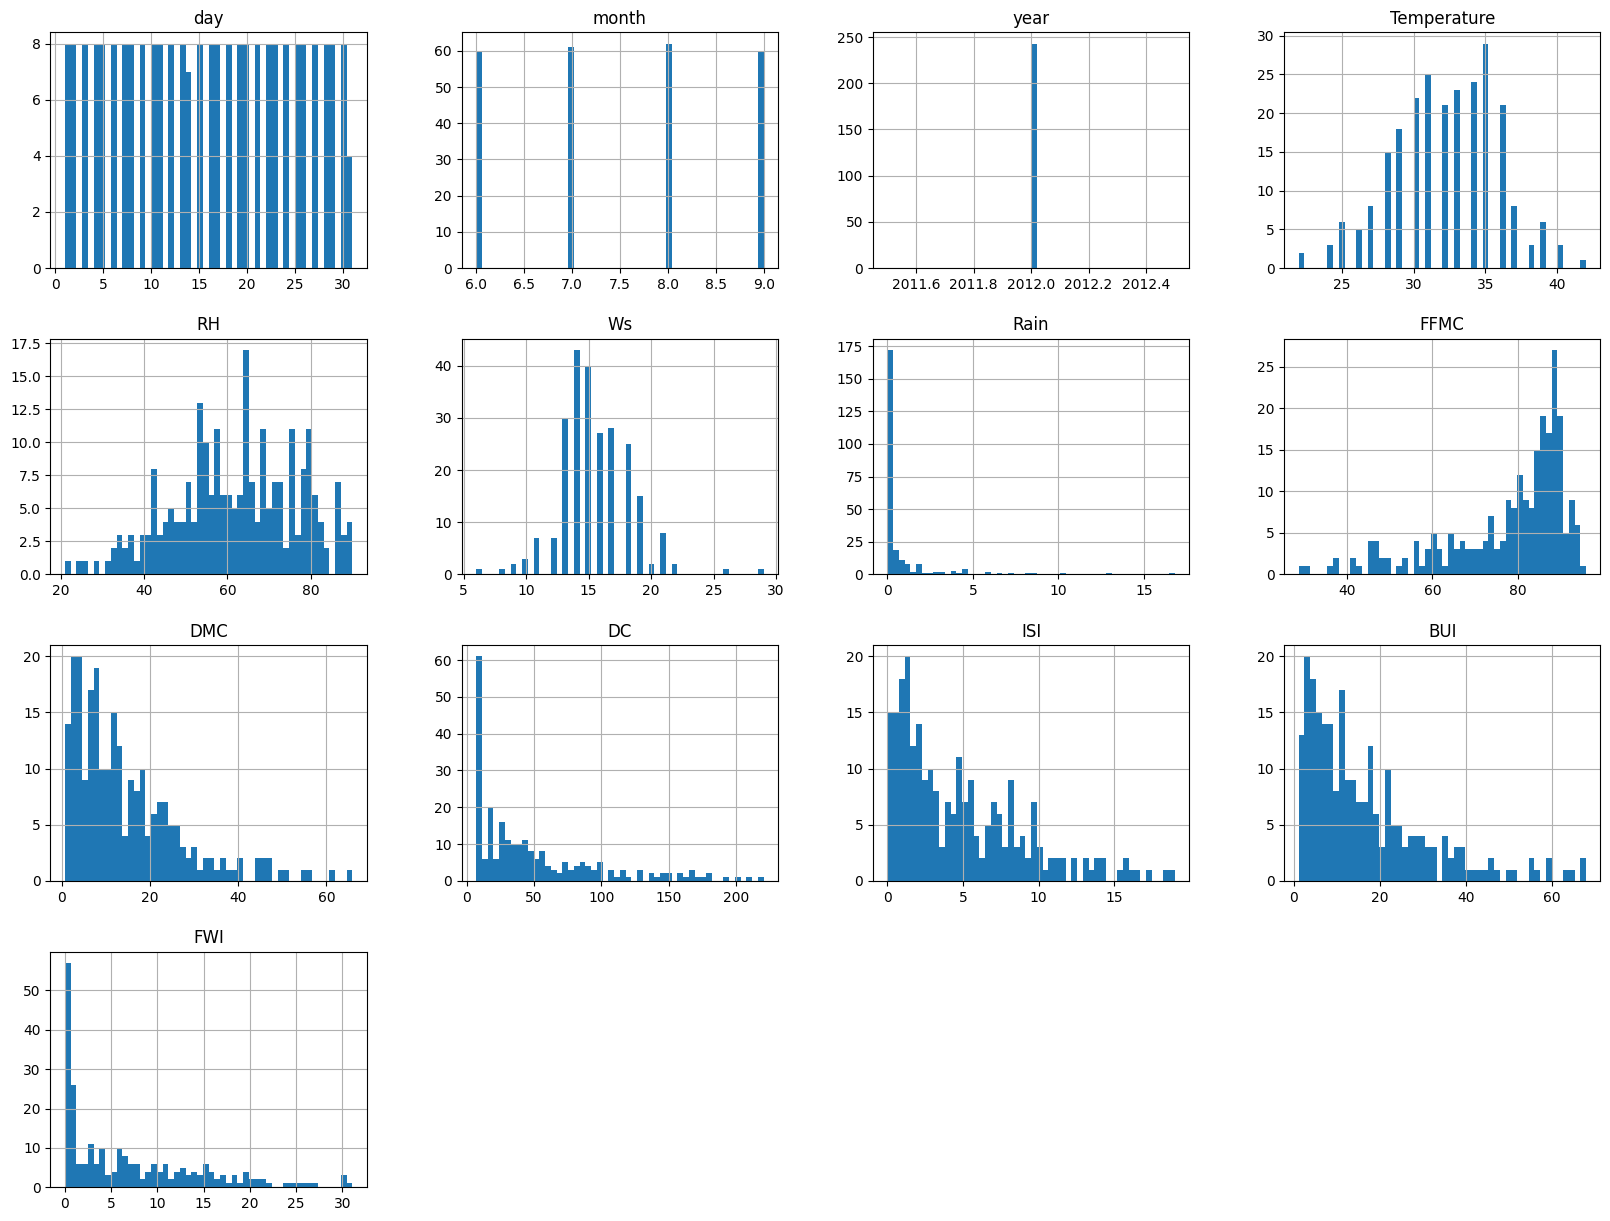

In [68]:
df.hist(bins = 50,figsize=(20,15))
plt.show()

Observations:

* Most of these features have heavy tails (BUI,ISI,DMC),FFMC. We will deal with these features and convert them to normal distributions if we do not have a good model at the end
* Our output feature (FWI) follows a Pareto distribution. This could be a problem as well.

In [69]:
# Drop the day,month and the year features since we will not be using them in our final application

data = df.copy()
data.drop(['day','month','year'],axis = 1,inplace = True)

In [70]:
# Splitting our data into training and testing sets

from sklearn.model_selection import train_test_split

X = data.drop('FWI',axis = 1)
y = data['FWI']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

print(f"Shape of our training set: {X_train.shape}")
print(f"Shape of our testing set: {X_test.shape}")

Shape of our training set: (194, 11)
Shape of our testing set: (49, 11)


In [71]:
# Looking at the first few rows of the data
X_train.sample(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
181,37,55,15,0.0,89.3,28.3,67.2,8.3,28.3,fire,Sidi-Bel Abbes
204,36,43,16,0.0,91.2,46.1,137.7,11.5,50.2,fire,Sidi-Bel Abbes
183,40,34,14,0.0,93.3,10.8,21.4,13.8,10.6,fire,Sidi-Bel Abbes
17,31,78,14,0.3,56.9,1.9,8.0,0.7,2.4,not fire,Bejaia
130,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,not fire,Sidi-Bel Abbes


We need to encode the clases and the region columns. I will go ahead and use One Hot Encoding

In [72]:
# Perform OneHotEncoding and Standardization

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Get the categorical features in our dataset
cat_features = X_train.select_dtypes(include=['object']).columns.to_list()
num_features = [i for i in X_train.columns.to_list() if i not in cat_features]

ohe = OneHotEncoder(drop='first',sparse_output=False)
std_scaler = StandardScaler()

preprocessing = ColumnTransformer(
    transformers = [
        ('OHE',ohe,[9,10]),
        ('StandardScaler',std_scaler,[0,1,2,3,4,5,6,7,8])
    ], remainder= 'passthrough'
)

X_train_preprocessed = preprocessing.fit_transform(X_train)
X_test_preprocessed = preprocessing.transform(X_test)

R2 score for our Linear Regression model is 98.81%
Mean Absolute Error for our Linear Regression model is 0.6153375737533936%


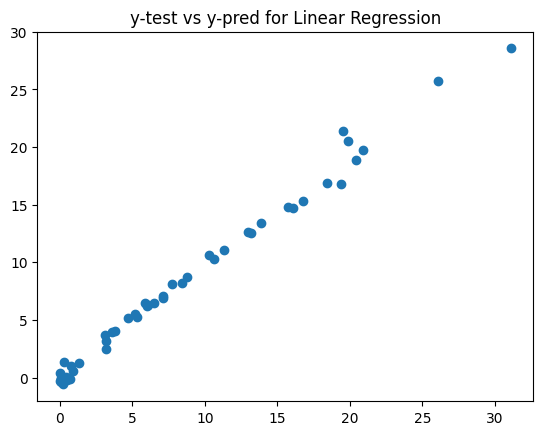

In [73]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

linear_regression = LinearRegression()
linear_regression.fit(X_train_preprocessed,y_train)
y_pred = linear_regression.predict(X_test_preprocessed)

#Take a look at the metrics
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 score for our Linear Regression model is {100*r2:.2f}%")
print(f"Mean Absolute Error for our Linear Regression model is {mae}%")
plt.scatter(y_test,y_pred)
plt.title('y-test vs y-pred for Linear Regression')
plt.show()

R2 score for our Linear Regression model is 98.77%
Mean Absolute Error for our Linear Regression model is 0.6256775490098103%


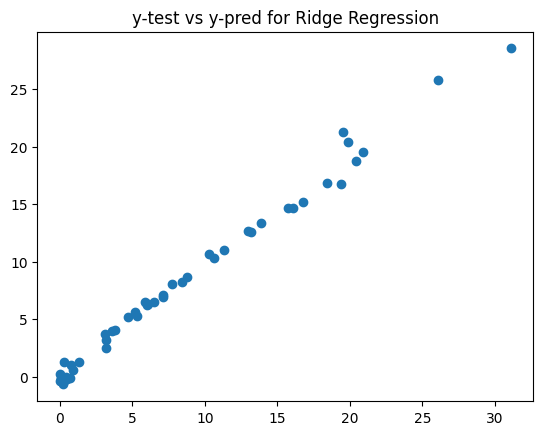

In [74]:
# Applying Ride Regression (to check for over-fitting)

from sklearn.linear_model import Ridge

ridge_regression = Ridge()
ridge_regression.fit(X_train_preprocessed,y_train)
y_pred_ridge = ridge_regression.predict(X_test_preprocessed)

#Take a look at the metrics
r2 = r2_score(y_test,y_pred_ridge)
mae = mean_absolute_error(y_test,y_pred_ridge)
print(f"R2 score for our Linear Regression model is {100*r2:.2f}%")
print(f"Mean Absolute Error for our Linear Regression model is {mae}%")
plt.scatter(y_test,y_pred_ridge)
plt.title('y-test vs y-pred for Ridge Regression')
plt.show()

R2 score for our Linear Regression model is 98.81%
Mean Absolute Error for our Linear Regression model is 0.6153375737533936%


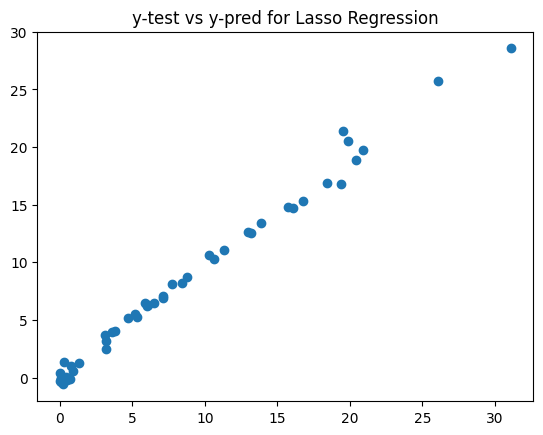

In [75]:
# Apply Lasso Regression (for feature selection)

from sklearn.linear_model import Lasso

lasso_regression = Lasso()
lasso_regression.fit(X_train_preprocessed,y_train)
y_pred_lasso = linear_regression.predict(X_test_preprocessed)


#Take a look at the metrics
r2 = r2_score(y_test,y_pred_lasso)
mae = mean_absolute_error(y_test,y_pred_lasso)
print(f"R2 score for our Linear Regression model is {100*r2:.2f}%")
print(f"Mean Absolute Error for our Linear Regression model is {mae}%")
plt.scatter(y_test,y_pred_lasso)
plt.title('y-test vs y-pred for Lasso Regression')
plt.show()

R2 score for our Linear Regression model is 92.05%
Mean Absolute Error for our Linear Regression model is 1.646323753516452%


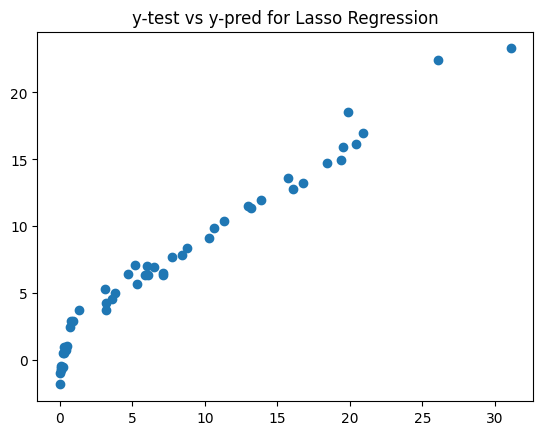

In [76]:
# Apply ElasticNet

from sklearn.linear_model import ElasticNet

enet_regression = ElasticNet()
enet_regression.fit(X_train_preprocessed,y_train)
y_pred_enet = enet_regression.predict(X_test_preprocessed)


#Take a look at the metrics
r2 = r2_score(y_test,y_pred_enet)
mae = mean_absolute_error(y_test,y_pred_enet)
print(f"R2 score for our Linear Regression model is {100*r2:.2f}%")
print(f"Mean Absolute Error for our Linear Regression model is {mae}%")
plt.scatter(y_test,y_pred_enet)
plt.title('y-test vs y-pred for Lasso Regression')
plt.show()

Observations:
* From my initial observations, I can not see any model overfitting and the R-2 score looks good for all the models except the ElasticNet model. However, I will go ahead and confirm it using Cross Validation sets.
* I think that collinearity is the reason for ElasticNet not performing well. I will remove highly correlated features and train my model again.

R2 score for our Linear Regression model is 98.89%
Mean Absolute Error for our Linear Regression model is 0.5810447036217717%


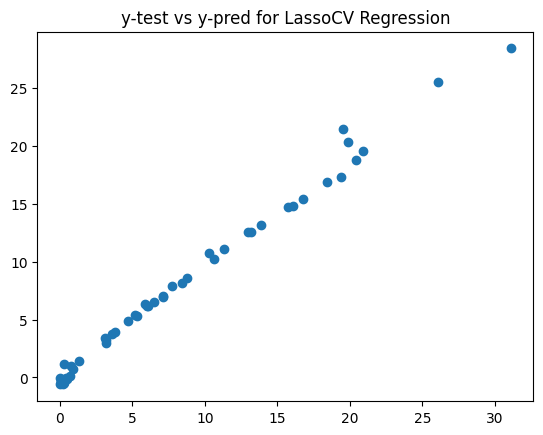

In [77]:
# Apply LassoCV model
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv = 10)
lasso_cv.fit(X_train_preprocessed,y_train)
y_pred_lassocv = lasso_cv.predict(X_test_preprocessed)

#Take a look at the metrics
r2 = r2_score(y_test,y_pred_lassocv)
mae = mean_absolute_error(y_test,y_pred_lassocv)
print(f"R2 score for our Linear Regression model is {100*r2:.2f}%")
print(f"Mean Absolute Error for our Linear Regression model is {mae}%")
plt.scatter(y_test,y_pred_lassocv)
plt.title('y-test vs y-pred for LassoCV Regression')
plt.show()

R2 score for our Linear Regression model is 98.80%
Mean Absolute Error for our Linear Regression model is 0.616472723772334%


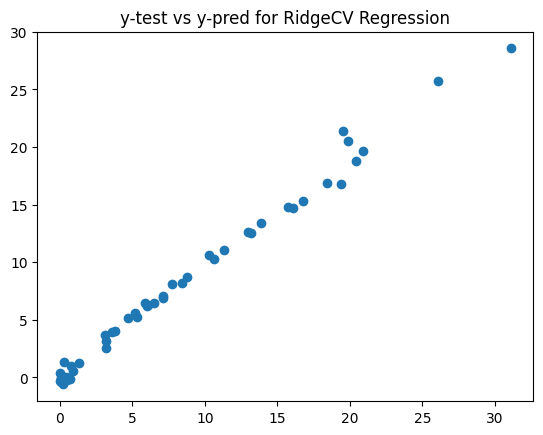

In [78]:
# Apply RidgeCV model
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(cv = 10)
ridge_cv.fit(X_train_preprocessed,y_train)
y_pred_ridgecv = ridge_cv.predict(X_test_preprocessed)

#Take a look at the metrics
r2 = r2_score(y_test,y_pred_ridgecv)
mae = mean_absolute_error(y_test,y_pred_ridgecv)
print(f"R2 score for our Linear Regression model is {100*r2:.2f}%")
print(f"Mean Absolute Error for our Linear Regression model is {mae}%")
plt.scatter(y_test,y_pred_ridgecv)
plt.title('y-test vs y-pred for RidgeCV Regression')
plt.show()

R2 score for our Linear Regression model is 98.75%
Mean Absolute Error for our Linear Regression model is 0.6407074673110004%


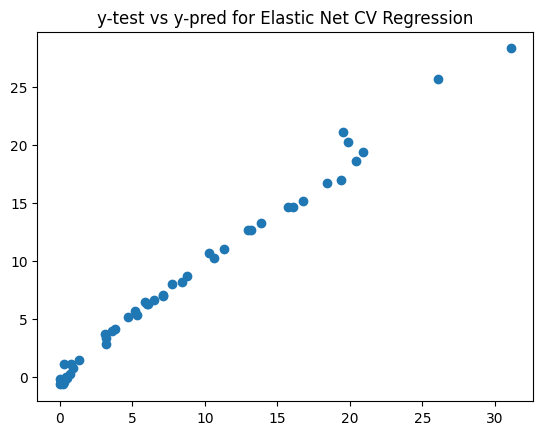

In [79]:
# Apply ElasticNet Model
from sklearn.linear_model import ElasticNetCV

enet_cv = ElasticNetCV(cv = 10)
enet_cv.fit(X_train_preprocessed,y_train)
y_pred_enetcv = enet_cv.predict(X_test_preprocessed)

#Take a look at the metrics
r2 = r2_score(y_test,y_pred_enetcv)
mae = mean_absolute_error(y_test,y_pred_enetcv)
print(f"R2 score for our Linear Regression model is {100*r2:.2f}%")
print(f"Mean Absolute Error for our Linear Regression model is {mae}%")
plt.scatter(y_test,y_pred_enetcv)
plt.title('y-test vs y-pred for Elastic Net CV Regression')
plt.show()

R2 score for our Linear Regression model is 98.80%
Mean Absolute Error for our Linear Regression model is 0.616472723772334%


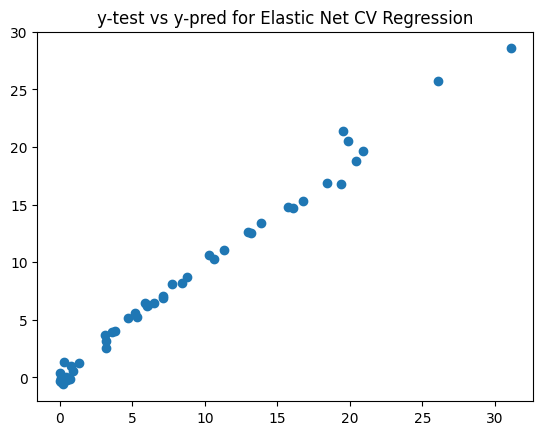

In [80]:
# I will go ahead and select the Lasso Regression as it is permorming the best among all the models which I have tested till now.
# Create a pipeline with Lasso Regression.

forest_fire_model = Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('final_model',ridge_cv)
]
)

forest_fire_model.fit(X_train,y_train)
y_pred_forest_fire_model = forest_fire_model.predict(X_test)

# Compute the metrics
r2 = r2_score(y_test,y_pred_forest_fire_model)
mae = mean_absolute_error(y_test,y_pred_forest_fire_model)
print(f"R2 score for our Linear Regression model is {100*r2:.2f}%")
print(f"Mean Absolute Error for our Linear Regression model is {mae}%")
plt.scatter(y_test,y_pred_forest_fire_model)
plt.title('y-test vs y-pred for Elastic Net CV Regression')
plt.show()

In [81]:
# Pickle our Machine Learning model

import os
import pickle

# Get the absolute path of the current script
current_dir = os.getcwd()

# Specify the desired path for the model folder
model_folder = os.path.join(current_dir, '..', 'model')

# Create the model folder if it doesn't exist
os.makedirs(model_folder, exist_ok=True)

# Save the model to the specified path
pickle.dump(forest_fire_model, open(os.path.join(model_folder, 'forest_fire_final_model.pkl'), 'wb'))



In [82]:
# Testing out our pickle file model


# Assuming your current working directory is in the 'notebooks' folder
model_path = os.path.join('..', 'model', 'forest_fire_final_model.pkl')  # Adjust the file name

with open(model_path, 'rb') as file:
    loaded_pipeline = pickle.load(file)


# Prepare your data (replace with your actual data)
new_data = [[35,68,19,0.0,88.3,25.9,130.6,8.8,34.7,"fire","Bejaia"]]

# Make predictions
predictions = loaded_pipeline.predict(new_data)

print(predictions)


[15.26856689]


/Users/archishkoshe/Downloads/ForestFirePrediction/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Users/archishkoshe/Downloads/ForestFirePrediction/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
